In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
import nltk
from nltk import  punkt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import csv
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [164]:
np.random.seed(500)

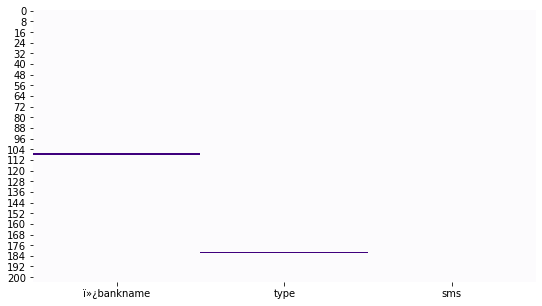

In [165]:
transactions = pd.read_csv("newtransactions.csv",encoding='latin-1')
missing_value = pd.DataFrame(transactions.isna().sum().sort_values(ascending=False),columns=['No.records'])
missing_value['percentage']=(transactions.isna().sum()/len(transactions))*100
missing_value

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(transactions.isnull(), cbar=False, cmap="Purples")
plt.show()

In [166]:
transactions['sms'].dropna(inplace=True)

In [167]:
transactions['sms'] = [entry.lower() for entry in transactions['sms']]

In [168]:
transactions.head()

,ï»¿bankname,type,sms
0,AlAhli,Withdrawl,pos purchase (apple pay)\namount 990 sar\nmada...
1,Sabb,Other,"dear customer, please update your personal inf..."
2,Gulf International bank,Withdrawl,"atm withdrawal \namount: sar 2,500.00 \ncard:*..."
3,Gulf International bank,Withdrawl,pos purchase\namount: sar 85.42\nat:aldrees 40...
4,Gulf International bank,Other,notification: online banking service\nstatus: ...


In [169]:
print(transactions.shape)
print(transactions.size)
print(transactions['sms'])

(204, 3)
612
0      pos purchase (apple pay)\namount 990 sar\nmada...
1      dear customer, please update your personal inf...
2      atm withdrawal \namount: sar 2,500.00 \ncard:*...
3      pos purchase\namount: sar 85.42\nat:aldrees 40...
4      notification: online banking service\nstatus: ...
                             ...                        
199    credit transfer internal\namount: 1,400 sar\nt...
200    dear customer,\nto complete the internet purch...
201    online purchase\namount: 48.85 sar\nmada card:...
202    debit transfer internal\namount: 200 sar\nto b...
203    mada atheer pos purchase\namount: 129 sar\nmad...
Name: sms, Length: 204, dtype: object


In [170]:
#this method deletes arabic word in an english text
def remove_arabic(msg):
    arr_msg = msg.split(' ');

    regexPattern = "^[a-zA-Z0-9]*$";

    english_arr_msg = [ i for i in arr_msg if re.search(regexPattern,i) and i != '']


    space = " "
    return space.join(english_arr_msg)


In [171]:
#remove_arabic
transactions['sms'] = [remove_arabic(entry) for entry in transactions['sms']]


In [172]:
#tokenizedWords = np.empty(204, dtype = str)
tokenizer = RegexpTokenizer("[\w+|\$[\d\.]+|\S+]+")

#for i in range(204):
   # for x in transactions['sms']:
     #       token =  tokenizer.tokenize(x)
        
transactions['sms']= [tokenizer.tokenize(entry) for entry in transactions['sms']]
           
       

In [173]:
#Test row number 4 with tozentation 
print(transactions['sms'][5])

['sar']


In [174]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV


for index,entry in enumerate(transactions['sms']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
                   word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
    Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    transactions.loc[index,'sms_final'] = str(Final_words)
     

[nltk_data] Downloading package wordnet to /Users/hailah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hailah/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hailah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hailah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
